In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc
from sklearn import tree
from sklearn import ensemble
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("aug_train.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [4]:
tf = pd.read_csv("aug_test.csv")
tf


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
display(df[["city","city_development_index","relevent_experience","gender","education_level","major_discipline","experience","company_size","company_type","last_new_job","training_hours","target"]].groupby(["gender","education_level","experience","company_size"]).agg(["max","mean","min"]).style.background_gradient(cmap="Oranges"))

In [7]:
plt.figure(figsize = [15,17])
fft = ["relevant"]

<Figure size 1080x1224 with 0 Axes>

In [8]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


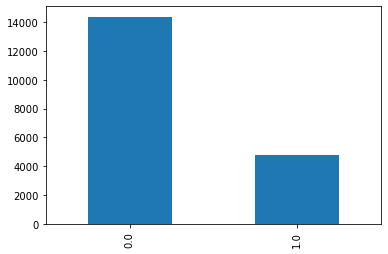

In [9]:
df["target"].value_counts().plot(kind = "bar")
plt.show()

In [10]:
df["kfold"]= -1
df = df.sample(frac =1).reset_index(drop= True) #Randomize rows 
y = df.target.values
kf = StratifiedKFold(n_splits = 5)
for f , (t_,v_) in enumerate(kf.split(X = df,y= y)):
    df.loc[v_,"kfold"] = f
df.to_csv("train_folds.csv",index = False)

In [11]:
train_kf = pd.read_csv("train_folds.csv")
train_kf

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,kfold
0,10515,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,STEM,3,10/49,Pvt Ltd,2,7,1.0,0
1,3121,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,<1,<10,Early Stage Startup,1,40,1.0,0
2,9468,city_103,0.920,Female,Has relevent experience,no_enrollment,Masters,Arts,4,50-99,NGO,4,54,0.0,0
3,1623,city_103,0.920,NaN,No relevent experience,no_enrollment,Graduate,STEM,10,1000-4999,Pvt Ltd,>4,204,0.0,0
4,12143,city_104,0.924,Male,No relevent experience,Full time course,Masters,STEM,>20,500-999,NGO,2,24,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,25695,city_67,0.855,Other,No relevent experience,no_enrollment,Masters,Humanities,4,10000+,Pvt Ltd,4,13,0.0,4
19154,24677,city_41,0.827,NaN,Has relevent experience,no_enrollment,Masters,STEM,>20,500-999,Pvt Ltd,>4,160,0.0,4
19155,11017,city_11,0.550,NaN,Has relevent experience,Full time course,Graduate,STEM,4,100-500,Pvt Ltd,1,106,0.0,4
19156,13225,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,18,50-99,Pvt Ltd,>4,41,0.0,4


Since we have a unbalanced dataset we shall try going with a stratified k fold cross validation. The metrics we shall be using for evaluation is going to be a AUC 

## Feature Engineering

**Nominal variables :** Gender , enrolled university, major discipline, company_type, city <br>
**Ordinal variables :** Education Level, Experience

Before using these features first lets fill the null values or drop null values where required

In [12]:
train_kf.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
kfold                        0
dtype: int64

## Creating a Custom Transformer for cleaning Data and Filling Nan Values

In [13]:
class Nantransform(BaseEstimator, TransformerMixin):
    def __init__(self, fillNan = True):
        self.fillNaN = fillNan
    def fit(self,X,y= None):
        return self
    def transform(self,df,y = None):
        df["gender"]  = df["gender"].fillna("Do not Disclose")
        df["major_discipline"]  = df["major_discipline"].fillna("Other")
        df["company_size"]  = df["company_size"].fillna("Do not Disclose")
        df["company_type"]  = df["company_type"].fillna("Do not Disclose")
        df["last_new_job"]  = df["last_new_job"].fillna("1")
        df["enrolled_university"]  = df["enrolled_university"].fillna("no_enrollment")
        df["experience"]  = df["experience"].fillna("No")
        df["education_level"] = df["education_level"].fillna("None")
        
        
        #Creating Dictionary for Mapping
        mapping = { "<1": 0.5,
        ">20": 21,
        "5" : 5,
        "4" :4, 
        "3" :3,
        "6" : 6,  
        "2" :2,
        "7" :7,
        "10" :10, 
        "9"  :9,
        "8"  :8,
        "15" :15,
        "11" :11,     
        "14" :14,    
        "1":  1,
        "16": 16,
        "12" :12,
        "13" :13,
        "17" :17,
        "19"  :19,    
        "18"  :18,   
        "20"  :20,  
        "No" :0,
        }
        Binary_mapping = {"Has relevent experience" :1,"No relevent experience":0}
        
        company_size_mapping = {"<10" : 1, "10/49" :2, "50-99":3,"100-500":4,"500-999":5,
                                "1000-4999":6,"5000-9999":7,"10000+":8,"Do not Disclose":0}
        
        education_mapping = {"Primary School":1,"High School":2,"Graduate":3,"Masters":4,"Phd":5,"None":0}
        
        gta = pd.DataFrame() 
        for x in df.columns:
            if x == "experience":
                df[x] = df[x].map(mapping)
            elif x == "relevent_experience":
                df[x]=df[x].map(Binary_mapping)
            elif x == "training_hours":
                df[x] = np.log(df[x])
            elif x == "company_size":
                df[x]=df[x].map(company_size_mapping)
            elif x == "education_level":
                df[x]=df[x].map(education_mapping)
                
            if x in ["enrolled_university","gender","major_discipline","company_type","last_new_job"]:
                gta = pd.get_dummies(df[x])
                df =  df.merge(gta, left_index = True, right_index = True)
                df = df.drop([x],axis = 1)
            
        df = df.drop(["city"],axis = 1)
        return df

In [14]:
fillnan = Nantransform()
train = fillnan.transform(train_kf)
train

,enrollee_id,city_development_index,relevent_experience,education_level,experience,company_size,training_hours,target,kfold,Do not Disclose_x,...,NGO,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
0,10515,0.624,1,3,3.0,2,1.945910,1.0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,3121,0.624,1,4,0.5,1,3.688879,1.0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,9468,0.920,1,4,4.0,3,3.988984,0.0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1623,0.920,0,3,10.0,6,5.318120,0.0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,12143,0.924,0,4,21.0,5,3.178054,0.0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,25695,0.855,0,4,4.0,8,2.564949,0.0,4,0,...,0,0,0,1,0,0,0,1,0,0
19154,24677,0.827,1,4,21.0,5,5.075174,0.0,4,1,...,0,0,0,1,0,0,0,0,1,0
19155,11017,0.550,1,3,4.0,4,4.663439,0.0,4,1,...,0,0,0,1,1,0,0,0,0,0
19156,13225,0.920,1,3,18.0,3,3.713572,0.0,4,0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
train.columns

Index(['enrollee_id', 'city_development_index', 'relevent_experience',
       'education_level', 'experience', 'company_size', 'training_hours',
       'target', 'kfold', 'Do not Disclose_x', 'Female', 'Male', 'Other_x',
       'Full time course', 'Part time course', 'no_enrollment', 'Arts',
       'Business Degree', 'Humanities', 'No Major', 'Other_y', 'STEM',
       'Do not Disclose_y', 'Early Stage Startup', 'Funded Startup', 'NGO',
       'Other', 'Public Sector', 'Pvt Ltd', '1', '2', '3', '4', '>4', 'never'],
      dtype='object')

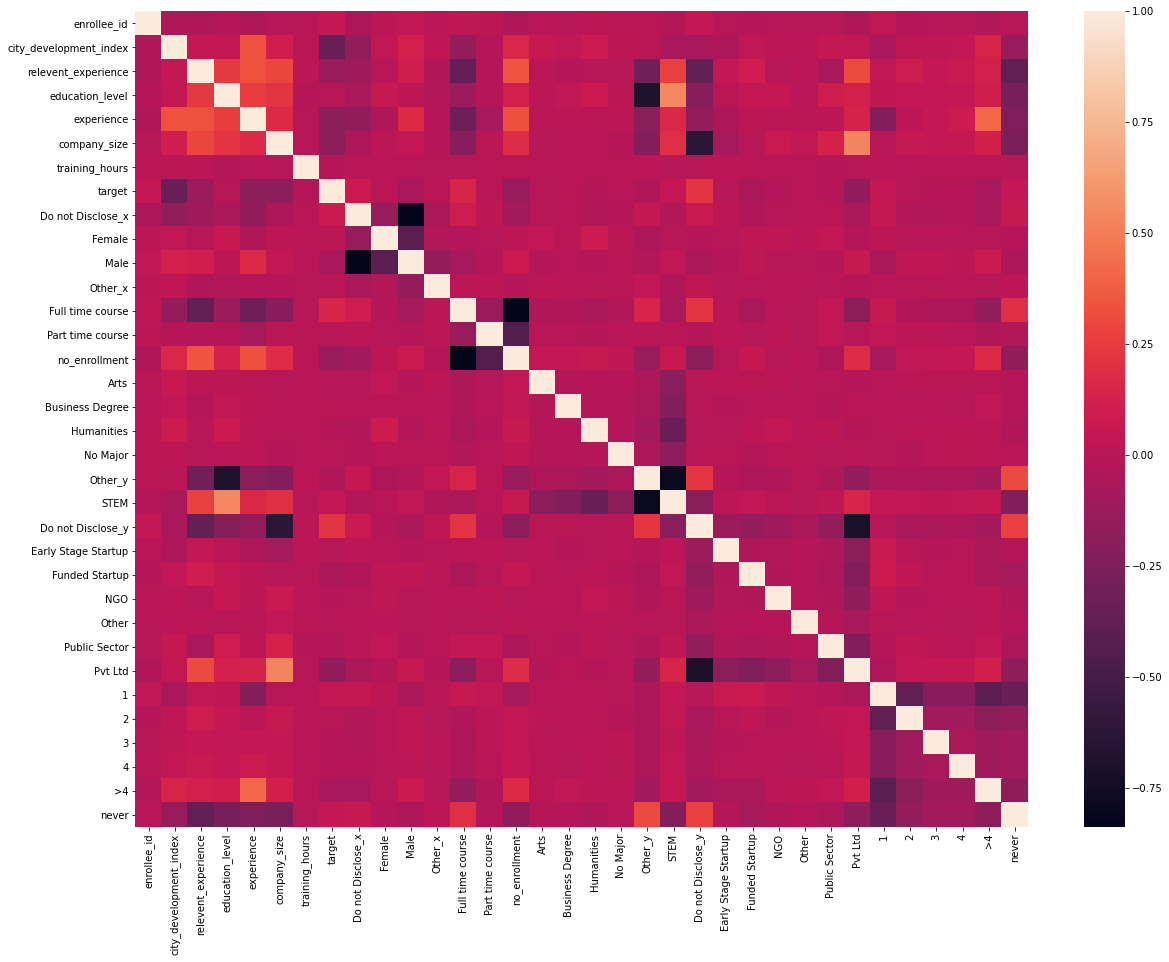

In [16]:
features = [f for f in train.columns if f not in ("kfold")]
x = train[features].corr()
plt.subplots(figsize=(20,15))
sn.heatmap(x)
plt.show()

In [17]:
Correlation = pd.DataFrame(train[features].corrwith(train["target"]))
Correlation.sort_values(by = 0 ,ascending = False)

,0
target,1.000000
Do not Disclose_y,0.220533
Full time course,0.150171
Do not Disclose_x,0.075356
STEM,0.049881
enrollee_id,0.049475
never,0.046082
1,0.041004
Female,0.008494
Business Degree,0.004157


In [18]:
def run(fold,df):
    features = [f for f in df.columns if f not in ("target","kfold","enrollee_id")]
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    oversample = SMOTE()
    X, y = oversample.fit_resample(df_train[features],df_train.target.values)
    x_train = X
    x_valid = df_valid[features]
    model = linear_model.LogisticRegression(max_iter = 1000)
    model.fit(x_train,y)
    valid_preds = model.predict(x_valid)
    accuracy  = classification_report(df_valid.target.values,valid_preds)
    print(f"fold={fold} \n{accuracy} \n{roc_auc_score(df_valid.target.values,valid_preds)}")

In [19]:
if __name__ == "__main__":
    run(0,train)
    run(1,train)
    run(2,train)
    run(3,train)
    run(4,train)

fold=0 
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      2876
         1.0       0.52      0.58      0.55       956

    accuracy                           0.76      3832
   macro avg       0.69      0.70      0.69      3832
weighted avg       0.77      0.76      0.77      3832
 
0.7007320720898971
fold=1 
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84      2876
         1.0       0.51      0.54      0.52       956

    accuracy                           0.76      3832
   macro avg       0.68      0.68      0.68      3832
weighted avg       0.76      0.76      0.76      3832
 
0.6822469608533469
fold=2 
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      2877
         1.0       0.50      0.58      0.54       955

    accuracy                           0.75      3832
   macro avg       0.68      0.69      0.68      3832
weighted a

In [20]:
def run(fold,df):
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    features = [f for f in df.columns if f not in ("target","kfold","enrollee_id")]
    oversample = SMOTE()
    X, y = oversample.fit_resample(df_train[features],df_train.target.values)
    x_train = X
    x_valid = df_valid[features]
    model = ensemble.RandomForestClassifier(criterion='entropy', max_features=10,
                       min_samples_split=25, n_estimators=300)
    model.fit(x_train,y)
    valid_preds = model.predict(x_valid)
    valid_proba = model.predict_proba(x_valid)
    accuracy  = classification_report(df_valid.target.values,valid_preds)
    fpr_s ,tpr_s ,threshold_s = roc_curve(df_valid.target.values,valid_proba[:,1])
    print(f"fold={fold} \n{accuracy} \n{roc_auc_score(df_valid.target.values,valid_preds)}")
    return(fpr_s ,tpr_s ,threshold_s)

In [21]:
if __name__ == "__main__":
    run(0,train)
    run(1,train)
    run(2,train)
    run(3,train)
    fpr_r ,tpr_r ,threshold_r = run(4,train)
    

fold=0 
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.85      2876
         1.0       0.55      0.71      0.62       956

    accuracy                           0.78      3832
   macro avg       0.72      0.76      0.73      3832
weighted avg       0.81      0.78      0.79      3832
 
0.7577695369556742
fold=1 
              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84      2876
         1.0       0.53      0.66      0.59       956

    accuracy                           0.77      3832
   macro avg       0.70      0.73      0.71      3832
weighted avg       0.79      0.77      0.78      3832
 
0.7331908566640092
fold=2 
              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84      2877
         1.0       0.52      0.67      0.59       955

    accuracy                           0.77      3832
   macro avg       0.70      0.73      0.71      3832
weighted a

In [22]:
def run(fold,df):
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    features = [f for f in df.columns if f not in ("target","kfold","city_development_index")]
    oversample = SMOTE()
    X, y = oversample.fit_resample(df_train[features],df_train.target.values)
    x_train = X
    x_valid = df_valid[features]
    model = SVC(C = 5,probability=True)
    model.fit(x_train,y)
    valid_preds = model.predict(x_valid)
    valid_proba = model.predict_proba(x_valid)
    accuracy  = classification_report(df_valid.target.values,valid_preds)
    fpr_s ,tpr_s ,threshold_s = roc_curve(df_valid.target.values,valid_proba[:,1])
    print(f"fold={fold} \n{accuracy} \n{roc_auc_score(df_valid.target.values,valid_preds)}")
    return(fpr_s ,tpr_s ,threshold_s)

In [23]:
if __name__ == "__main__":
    run(0,train)
    run(1,train)
    run(2,train)
    run(3,train)
    fpr_s ,tpr_s ,threshold_s = run(4,train)

fold=0 
              precision    recall  f1-score   support

         0.0       0.78      0.41      0.54      2876
         1.0       0.27      0.64      0.38       956

    accuracy                           0.47      3832
   macro avg       0.52      0.53      0.46      3832
weighted avg       0.65      0.47      0.50      3832
 
0.5273203135456614
fold=1 
              precision    recall  f1-score   support

         0.0       0.77      0.40      0.52      2876
         1.0       0.26      0.64      0.37       956

    accuracy                           0.46      3832
   macro avg       0.51      0.52      0.45      3832
weighted avg       0.64      0.46      0.48      3832
 
0.5175787501236608
fold=2 
              precision    recall  f1-score   support

         0.0       0.77      0.46      0.58      2877
         1.0       0.27      0.59      0.37       955

    accuracy                           0.49      3832
   macro avg       0.52      0.53      0.47      3832
weighted a

In [24]:
def run(fold,df):
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    features = [f for f in df.columns if f not in ("target","kfold","enrollee_id")]
    oversample = SMOTE()
    X, y = oversample.fit_resample(df_train[features],df_train.target.values)
    x_train = X
    x_valid = df_valid[features]
    ada_clf = AdaBoostClassifier()
    ada_clf.fit(x_train,y)
    valid_preds = ada_clf.predict(x_valid)
    valid_proba = ada_clf.predict_proba(x_valid)
    accuracy  = classification_report(df_valid.target.values,valid_preds)
    print(f"fold={fold} \n{accuracy} \n{roc_auc_score(df_valid.target.values,valid_preds)}")
    fpr_a ,tpr_a ,threshold_a = roc_curve(df_valid.target.values,valid_proba[:,1])
    return(fpr_a ,tpr_a ,threshold_a)

In [25]:
if __name__ == "__main__":
    run(0,train)
    run(1,train)
    run(2,train)
    run(3,train)
    fpr_a ,tpr_a ,threshold_a = run(4,train)

fold=0 
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      2876
         1.0       0.51      0.71      0.60       956

    accuracy                           0.76      3832
   macro avg       0.70      0.74      0.71      3832
weighted avg       0.80      0.76      0.77      3832
 
0.7438598762809806
fold=1 
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83      2876
         1.0       0.51      0.68      0.58       956

    accuracy                           0.75      3832
   macro avg       0.69      0.73      0.70      3832
weighted avg       0.79      0.75      0.76      3832
 
0.7281665900454489
fold=2 
              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81      2877
         1.0       0.48      0.65      0.55       955

    accuracy                           0.74      3832
   macro avg       0.67      0.71      0.68      3832
weighted a

In [26]:
def run(fold,df):
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    features = [f for f in df.columns if f not in ("target","kfold","enrollee_id")]
    oversample = SMOTE()
    X, y = oversample.fit_resample(df_train[features],df_train.target.values)
    x_train = X
    x_valid = df_valid[features]
    model = xgb.XGBClassifier(n_jobs = -1 , max_depth = 7)
    model.fit(x_train,y)
    valid_preds = model.predict(x_valid)
    valid_proba = model.predict_proba(x_valid)
    accuracy  = classification_report(df_valid.target.values,valid_preds)
    fpr_s ,tpr_s ,threshold_s = roc_curve(df_valid.target.values,valid_proba[:,1])
    print(f"fold={fold} \n{accuracy} \n{roc_auc_score(df_valid.target.values,valid_preds)}")
    return(fpr_s ,tpr_s ,threshold_s)

In [27]:
if __name__ == "__main__":
    run(0,train)
    run(1,train)
    run(2,train)
    run(3,train)
    fpr_x ,tpr_x ,threshold_x = run(4,train)

C:\Users\sunsu\Miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
fold=0 
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      2876
         1.0       0.57      0.56      0.56       956

    accuracy                           0.78      3832
   macro avg       0.71      0.71      0.71      3832
weighted avg       0.78      0.78      0.78      3832
 
0.7073108280328908


C:\Users\sunsu\Miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
fold=1 
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      2876
         1.0       0.56      0.56      0.56       956

    accuracy                           0.78      3832
   macro avg       0.71      0.71      0.71      3832
weighted avg       0.78      0.78      0.78      3832
 
0.7057490645422222


C:\Users\sunsu\Miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
fold=2 
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      2877
         1.0       0.55      0.52      0.54       955

    accuracy                           0.77      3832
   macro avg       0.70      0.69      0.69      3832
weighted avg       0.77      0.77      0.77      3832
 
0.6900017652186414


C:\Users\sunsu\Miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
fold=3 
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      2876
         1.0       0.58      0.60      0.59       955

    accuracy                           0.79      3831
   macro avg       0.72      0.73      0.73      3831
weighted avg       0.80      0.79      0.79      3831
 
0.728544589999199


C:\Users\sunsu\Miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:10:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
fold=4 
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85      2876
         1.0       0.56      0.58      0.57       955

    accuracy                           0.78      3831
   macro avg       0.71      0.72      0.71      3831
weighted avg       0.78      0.78      0.78      3831
 
0.7151279045212592


In [28]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr,tpr,linewidth =2, label = label)
    
    plt.plot([0,1],[0,1],"k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

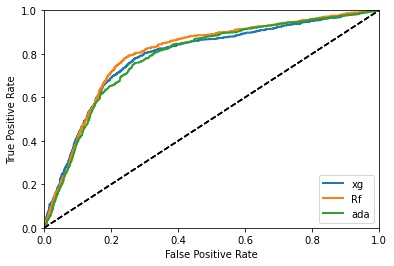

In [29]:
plot_roc_curve(fpr_x ,tpr_x ,"xg")
plot_roc_curve(fpr_r ,tpr_r ,"Rf")
plot_roc_curve(fpr_a ,tpr_a,"ada")
plt.legend(loc = "lower right")
plt.show()